# **Brief 6 - data vizualisation**

## **0) Nettoyage du jeux de données**  
Un fichier reprenant le frame nettoyer a été créer. Le fichier original a été sauvegardé. Le notebook utilise le nouveau fichier.

In [92]:
import numpy as np # algèbre linéaire
import pandas as pd # procès de données, CSV file I/O (e.g. pd.read_csv)

<span style="color: #FF0000">  
    
**Problème avec de split de wordCloud , remplacer les espaces par des espaces insécables ?** 
    </span>

In [93]:
# Chargement des données qui seront utilisées.
timesData = pd.read_csv("data/timesData_Original.csv")
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [94]:
df_clean=timesData


#-------------------------------------------------------------------------------
#
# Nettoyage des données: remplacer les pays mal orthographié (2 de trouvé)
# remplacer les '-' par des Nan
#
#-------------------------------------------------------------------------------

# pays:
df_clean["country"]= df_clean["country"].replace({'Unisted States of America':'United States of America',
                                                 'Unted Kingdom':'United Kingdom'})
#print(df_clean["country"].unique())

# income:
df_clean["income"]= df_clean["income"].replace({'-':None})
#print(df_clean["income"].sort_values())

# total_score
df_clean["total_score"]= df_clean["total_score"].replace({'-':None})
#print(df_clean["total_score"].tail(30))

# international
df_clean["international"]= df_clean["international"].replace({'-':None})
#print(df_clean["international"].head(30))

print("Les champs research et citations sont OK")

# Le champ num_students
print("Le champs num_students pose 2 problème: Effectif non renseigné et la ',' en sépparation des miliers \
avec un risque d'interprétation ou 99,345 serait inférieur à 100 !!!")

df_clean.num_students = [str(each).replace(',', '') for each in df_clean.num_students]
df_clean.num_students  = [str(each).replace('nan', '') for each in df_clean.num_students]
#num_students  = [int(each) for each in num_students ]

#print(df_clean.num_students)

# problème du "=" dans le rank (année 2016)
df_clean.world_rank  = [str(each).replace('=', '') for each in df_clean.world_rank]

# problème du "%" dans le rank (année 2016)
df_clean["international_students"]= [ float(str(each).replace('%',''))/100 for each in df_clean.international_students]
#print(df_clean.international_students.head(30))

# problème du " : " female_male_ratio 
df_clean["female_male_ratio"]= df_clean["female_male_ratio"].replace({'-':None})
#df_clean["female_male_ratio"]= df_clean["female_male_ratio"].replace({'nan':None})

a_cleaner  = [str(each).split() for each in df_clean.female_male_ratio]
j= 0
#print(len(a_cleaner))
a= []
for i in a_cleaner:
    #print(j+2," - ",i, " - ", a_cleaner[j])
    #j= j+1
    if i[0] != None and i[0] != 'nan' and i[0] != 'None' :
        if float(i[2])!= 0:
            a.append(float(i[0])/float(i[2]))
        else:
            a.append(1)
    else:
        a.append(None)
        pass
        #a_cleaner.append('nan')

df_clean.female_male_ratio= [each for each in a]

df_clean.to_csv("data/timesData.csv", index=False)

print("Le problème de la colonne 'world_rank' n'a pas été résolu. Celle-ci contient soit un nombre soit une\
      plage de données. On pourrait remplacer cette plage par une moyenne. Ou supprimer mettre à 'none' ce \
      champs lorsqu'il donnée sous forme de plage.")
print("On note que les données non numérique sont automatiquement convertie en Nan ")
print("La colonne proportion F/H pose égalemetn problème. Il faudrait la remplacer par un float. pour cela \
utilisation de regex pour extraire xx:yy et faire xx/yy")
"""
for i in df_clean.world_rank:
    print(i)
"""

Les champs research et citations sont OK
Le champs num_students pose 2 problème: Effectif non renseigné et la ',' en sépparation des miliers avec un risque d'interprétation ou 99,345 serait inférieur à 100 !!!
Le problème de la colonne 'world_rank' n'a pas été résolu. Celle-ci contient soit un nombre soit une      plage de données. On pourrait remplacer cette plage par une moyenne. Ou supprimer mettre à 'none' ce       champs lorsqu'il donnée sous forme de plage.
On note que les données non numérique sont automatiquement convertie en Nan 
La colonne proportion F/H pose égalemetn problème. Il faudrait la remplacer par un float. pour cela utilisation de regex pour extraire xx:yy et faire xx/yy


'\nfor i in df_clean.world_rank:\n    print(i)\n'

## **Début du brief**

In [101]:
#--------------- Chargement des données ---------------------

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pds
# librairie word cloud
from wordcloud import WordCloud

# librairie matplotlib
import matplotlib.pyplot as plt


datab6= pds.read_csv("./data/timesData.csv")
datab6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2367 non-null   float64
 13  year                    2603 non-null   int64  
dtypes: float64(10), int64(1), object(3)
memo

In [102]:
"""
world_rank
university_name 
country
teaching
international
research
citations
income
total_score
num_students
student_staff_ratio
international_students
female_male_ratio
year                
"""

import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 9

data = datab6[datab6.year==2016].iloc[:50,:]
# selection des colonnes à prendre en compte dans l'ACP
#data_pca = data[["world_rank","university_name","country","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio","year"]]

data.income = pd.to_numeric(data.income, errors='coerce')
data.international = pd.to_numeric(data.international, errors='coerce')
data.total_score = pd.to_numeric(data.total_score, errors='coerce')
data.num_students  = [str(each).replace(',', '') for each in data.num_students]
data.num_students =  pd.to_numeric(data.num_students, errors='coerce')
data.world_rank =  pd.to_numeric(data.world_rank)

"""
for i in data.world_rank:
    print(i)
"""

data_pca = data[["world_rank","teaching","international","research","citations","income","total_score", "num_students",
                 "student_staff_ratio"]]


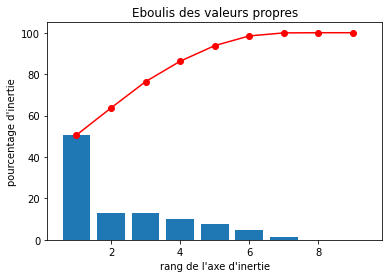

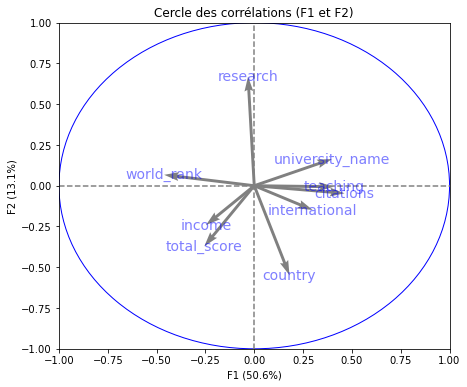

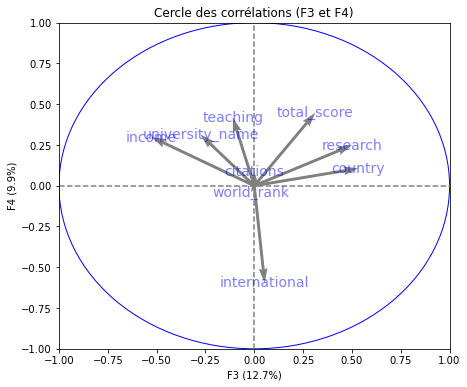

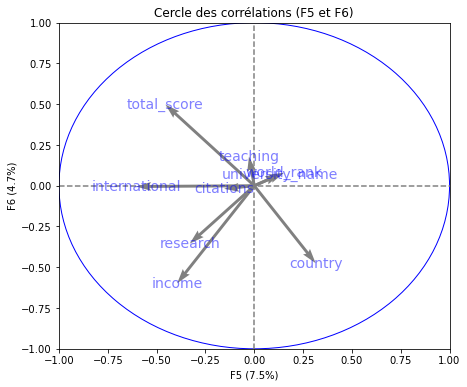

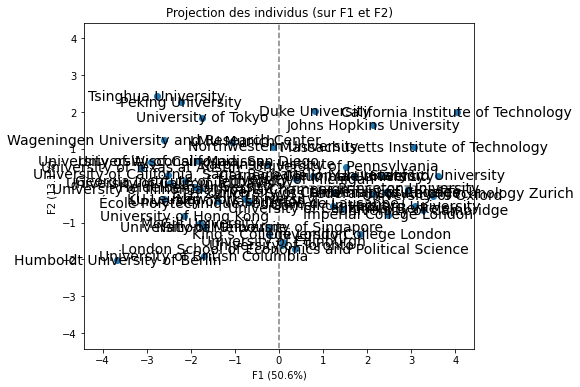

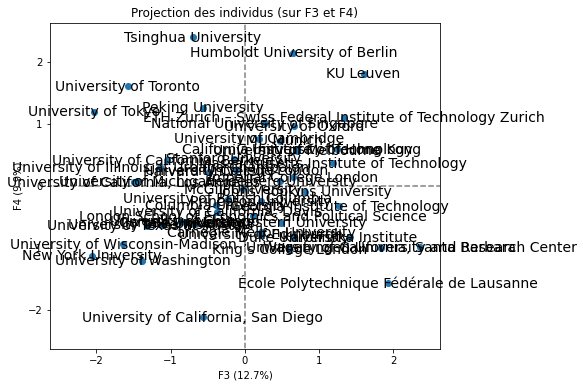

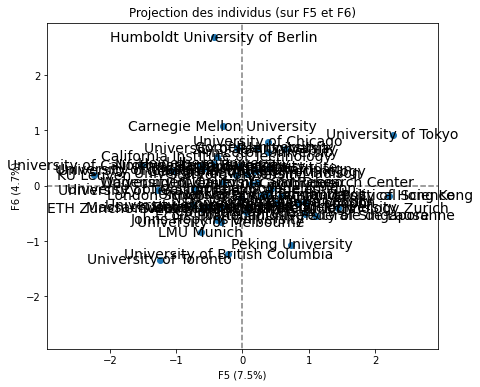

In [103]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["university_name"] # ou data.index pour avoir les intitulés
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_screen_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [104]:
#--------------- AFFICHAGE DE TOUTE LES DIMENSIONS ----------------------

"""
world_rank, university_name, country, teaching, international, research, citations, income, total_score,
num_students, student_staff_ratio, international_students, female_male_ratio, year                
"""

import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

import plotly.express as px

# choix du nombre de composantes à calculer
#n_comp = 9

# selection des colonnes à prendre en compte dans l'ACP
#data_pca = data[["world_rank","university_name","country","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio","year"]]

data.income = pd.to_numeric(data.income, errors='coerce')
data.international = pd.to_numeric(data.international, errors='coerce')
data.total_score = pd.to_numeric(data.total_score, errors='coerce')
data.num_students  = [str(each).replace(',', '') for each in data.num_students]
data.num_students =  pd.to_numeric(data.num_students, errors='coerce')
data.world_rank =  pd.to_numeric(data.world_rank, errors='coerce')

data_pca = data[["world_rank","teaching","international","research","citations","income","total_score", "num_students",
                 "student_staff_ratio"]]

features = ["world_rank","teaching","international","research","citations","income","total_score", 
            "num_students", "student_staff_ratio"]
#features = ["world_rank","teaching","international"]

couleur=[]
for donnees in data_pca["world_rank"]:
    if donnees < 11:
        coul= 1
    elif donnees < 21:
        coul= 2
    elif donnees < 31:
        coul= 3
    elif donnees < 41:
        coul= 4
    else:
        coul= 5
    couleur.append(coul)

fig = px.scatter_matrix(
    data_pca,
    dimensions=features,
    color= "world_rank"
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [105]:
from sklearn.decomposition import PCA

df = data_pca.dropna()
#print(df)
# Il faut Virer les nan ! sinon erreur de type: Input contains NaN, infinity or a value too large for 
#  dtype('float64').

n_components = int(input("n_components:"))

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'world_rank'

fig = px.scatter_matrix(
    components,
    color=df.world_rank,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=True)
fig.show()


n_components:2


In [33]:
import plotly.express as px
from sklearn.decomposition import PCA

#df = px.data.iris()
#X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=2)
components = pca.fit_transform(df)

fig = px.scatter(components, x=0, y=1, color=df['world_rank'])
fig.show()


In [ ]:
"""
html.Section(style={'height':'70vh', 'display':'flex', 'justify-content':' space-around'}, children=[
        html.Div(style={'height':'70vh', 'width':'50vw'}, children=[
                  ## Fig 1 : Correlation Matrix
                  dcc.Graph(
                      id='example-graph-1-1',
                      figure=fig1_1
                      ),
                  ]),
        html.Div(style={'height':'70vh', 'width':'50vw'}, children=[
                  ## Fig 1 : Correlation Matrix
                  dcc.Graph(
                      id='example-graph-1-2',
                      figure=fig1_2
                      ),
                  ]),
    ]),
"""

# **Sujet**

Contexte du projet
Classement des universités

Le classement des universités est une pratique difficile, politique et controversée. Il existe des centaines de systèmes de classement universitaires nationaux et internationaux différents, dont beaucoup sont en désaccord les uns avec les autres.

Le Times Higher Education World University Ranking est largement considéré comme l'une des mesures universitaires les plus influentes et les plus largement observées. Fondée au Royaume-Uni en 2010, elle a été critiquée pour sa commercialisation et pour avoir "affaibli" les établissements non anglophones.


ACP

Pour vous aider dans votre analyse du jeux de données, vous réaliserez une Analyse en Composantes Principales.

Cette analyse permettra de répondre à certaines questions du type : quelles ressemblances peut-il y avoir d'une université à une autre. Quelles ressemblances existent-il entre différents critères d'évaluation des universités ? Vous pourrez ainsi définir quand est-ce que 2 universités se ressemblent et quand est-ce qu'elles se ressemblent du point de vue de l'ensemble des colonnes (c'est-à-dire des critères d'évaluation du Times Higher Education World University Ranking).

Est-il possible de faire un bilan des ressemblances ? ( Vous chercherez ici à faire une typologie, une partition des universités, c'est-à-dire à construire des groupes d'universités homogènes du point de vue de l'ensemble des variables. A l'intérieur d'un groupe, les individus se ressemblent et d'un groupe à l'autre ils sont différents.
Modalités pédagogiques

    Réaliser une veille sur la librairie Dash.

    Faire une analyse du jeu de données correspondant au classement des 50 meilleures universités en 2016.

    Réaliser une Analyse en Composantes Principales (vous pourrez vous appuyer sur la librairie Scikit-Learn) 

    Mettre en place un Dashbord Dash multi-pages permettant de répondre à la question initiale : De toutes les universités du monde, quelles sont les meilleures ? La première page de votre Dashbord mettra en évidence l'analyse des données des 50 meilleures universités de l'année 2016 (avant L'ACP).

1ère page

    Dans cette première page se trouvera notamment une table des données des 50 meilleurs universités de l'année 2016 avec un bouton de téléchargement permettant de télécharger un tableau .csv des données.

    Plusieurs graphiques mettant en évidences des corrélations entre certains critères (par exemple : qualité de la recherche en fonction du rand mondial du classement des universités etc..)

2eme page

Cette page permettra d'afficher les résultats issus de l'ACP. On pourra ainsi y trouver des graphiques ainsi que des paragraphes de textes mettant en évidence des variables explicatives (par exemple la valeur propre, la proportion, le cumulé, les composantes principales (CP), les scores, les distances).

    Vous mettrez en ligne votre Dashboard Dash sur le serveur Cloud Heroku

Modalités d'évaluation

Un rendu individuel est demandé. Vous pourrez travailler en groupe de 5 ou 6. Le rendu final devra être envoyé le vendredi 4 novembre à 15h30.
